In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
train=pd.read_csv("sign_mnist_train.csv")
test=pd.read_csv("sign_mnist_test.csv")

In [35]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [36]:
labels=train['label'].values

In [37]:
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

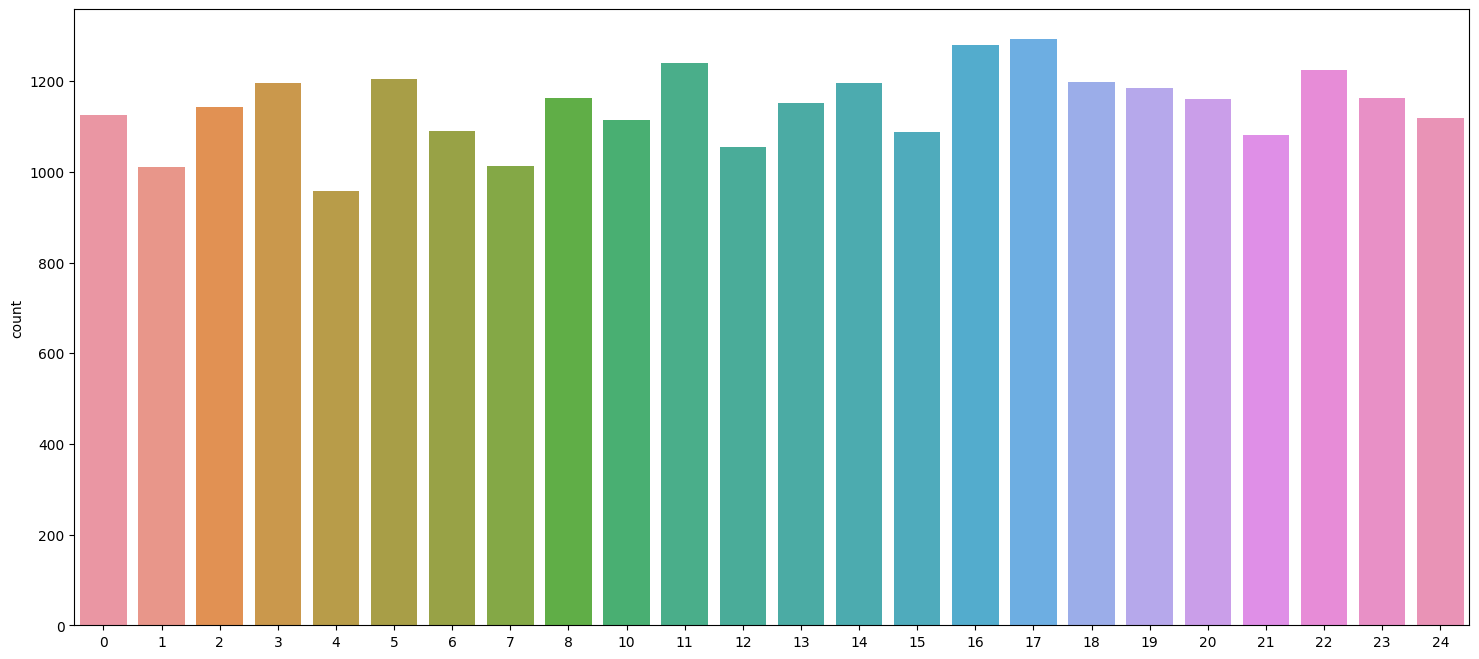

In [38]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [39]:
train.drop('label',axis=1,inplace=True)

In [40]:
images=train.values
images=np.array([np.reshape(i,(28,28))for i in images])
images=np.array([i.flatten() for i in images])

In [41]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer=LabelBinarizer()
labels= label_binrizer.fit_transform(labels)

In [42]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


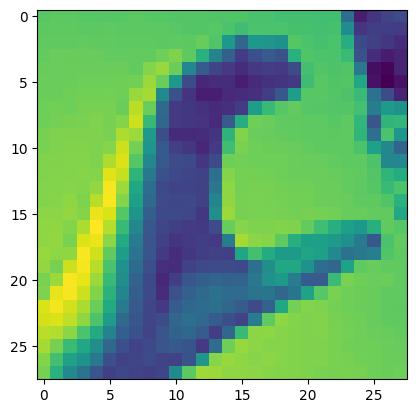

In [43]:
index=2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

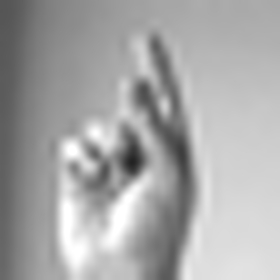

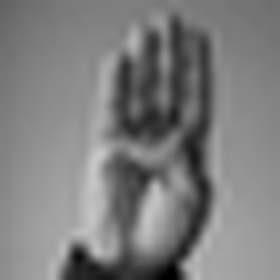

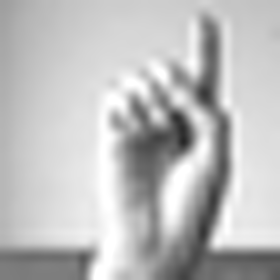

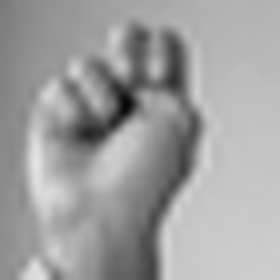

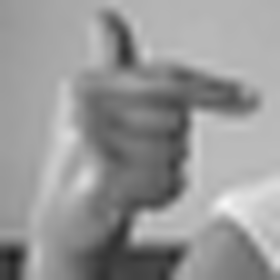

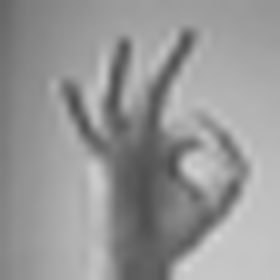

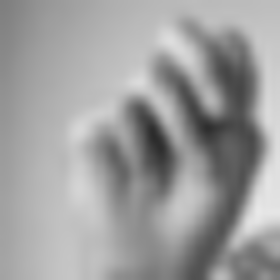

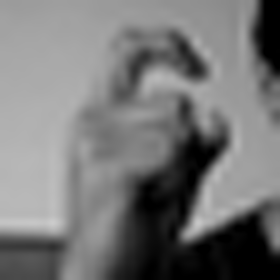

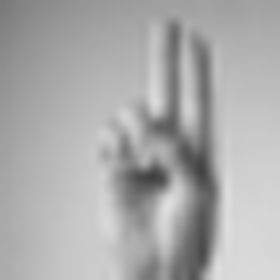

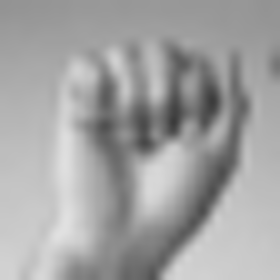

In [44]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2_imshow(sample)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size=128
num_classes=24
epochs=10

In [47]:
x_train=x_train/255
x_test=x_test/255

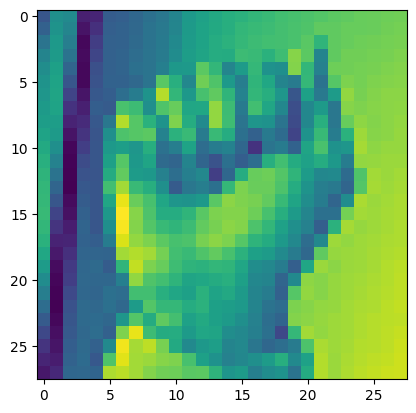

In [48]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [49]:
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes,activation='softmax'))

In [50]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 64)         

In [52]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 17s 106ms/step - loss: 2.6362 - accuracy: 0.1863 - val_loss: 1.7597 - val_accuracy: 0.4148
Epoch 2/10
151/151 [==============================] - 16s 106ms/step - loss: 1.3573 - accuracy: 0.5436 - val_loss: 0.8607 - val_accuracy: 0.7159
Epoch 3/10
151/151 [==============================] - 17s 116ms/step - loss: 0.7868 - accuracy: 0.7268 - val_loss: 0.5315 - val_accuracy: 0.8214
Epoch 4/10
151/151 [==============================] - 16s 107ms/step - loss: 0.5140 - accuracy: 0.8227 - val_loss: 0.3490 - val_accuracy: 0.8845
Epoch 5/10
151/151 [==============================] - 17s 115ms/step - loss: 0.3715 - accuracy: 0.8755 - val_loss: 0.2438 - val_accuracy: 0.9242
Epoch 6/10
151/151 [==============================] - 16s 108ms/step - loss: 0.2552 - accuracy: 0.9159 - val_loss: 0.1545 - val_accuracy: 0.9603
Epoch 7/10
151/151 [==============================] - 16s 108ms/step - loss: 0.1902 - accuracy: 0.9370 - val_loss: 0.1103 - val_ac

In [53]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model saved")

Model saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


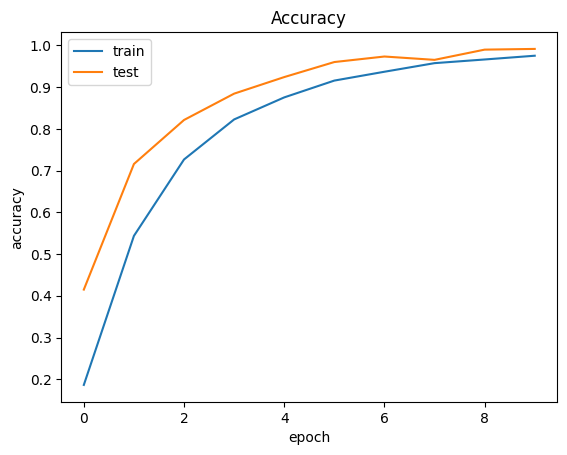

In [54]:
#View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"])
plt.show()

In [55]:
test_labels=test['label']
test.drop('label',axis=1,inplace=True)
test_images=test.values
test_images=np.array([np.reshape(i,(28,28)) for i in test_images])
test_images=np.array([i.flatten() for i in test_images])

test_labels=label_binrizer.fit_transform(test_labels)
test_images=test_images.reshape(test_images.shape[0],28,28,1)
test_images.shape
y_pred=model.predict(test_images)

225/225 [==============================] - 2s 8ms/step


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

0.814138315672058